In [1]:
import pandas as pd 
import numpy as np
data=pd.read_csv('hw3.csv')
data

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,NaN,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


# 
There are duplicate columns, I get rid of them by delicating the columns with the same ts in each token

There are wrong close price, which can be 100 times greater or 100times smaller, I correct those ones.

In [3]:
data['volumeUSD']=data['volume']*data['close']
data

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,7.041235e+05,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,3.522644e+05,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,1.296734e+07,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,7.352023e+07,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,1.341009e+07,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,2.308318e+05,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,8.503920e+06,SOL,SOL
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,4.057011e+05,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,5.729636e+07,ETH,ETH


first need to deal with wrong token

In [4]:
data.token.unique()


array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [5]:
def get_token(x):
    if len(x)>30:
        return x[23:-7]
    else:
        return x

In [6]:
data.token=data.token.apply(get_token)

In [7]:
data.token.unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'],
      dtype=object)

<AxesSubplot:>

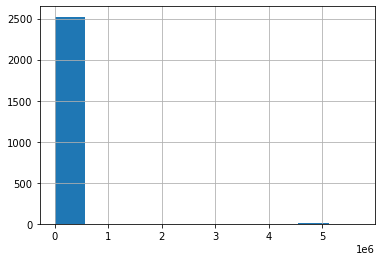

In [28]:
data.close.hist()

In [8]:
data.sort_values(by=['token','ts'])[data.token=='USDT']

<ipython-input-8-611a8d0a4a65>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values(by=['token','ts'])[data.token=='USDT']


,ts,open,high,low,close,volume,volumeUSD,token,chain
1382,2021-12-01 00:00:00,1.0008,1.0009,1.0008,1.0008,1588401.81,1.589673e+06,USDT,USDT
1681,2021-12-01 01:00:00,1.0008,1.0009,1.0008,1.0009,3429521.89,3.432608e+06,USDT,USDT
973,2021-12-01 02:00:00,1.0009,NaN,1.0008,1.0008,2136351.34,2.138060e+06,USDT,USDT
587,2021-12-01 03:00:00,1.0009,1.0010,1.0008,1.0008,2974174.19,2.976554e+06,USDT,USDT
1756,2021-12-01 04:00:00,1.0009,1.0010,1.0008,1.0008,4970508.62,4.974485e+06,USDT,USDT
...,...,...,...,...,...,...,...,...,...
614,2021-12-13 03:00:00,1.0004,1.0006,1.0004,1.0006,4337884.53,4.340487e+06,USDT,USDT
1992,2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.91,2.930650e+06,USDT,USDT
2128,2021-12-13 04:00:00,1.0006,1.0006,1.0004,1.0006,2928892.91,2.930650e+06,USDT,USDT
859,2021-12-13 05:00:00,1.0006,1.0006,1.0005,1.0006,2178755.17,2.180062e+06,USDT,USDT


There are duplicate columns and there are wrong numbers in the data, so I will get rid of each one

In [10]:
USDT=data.sort_values(by=['token','ts'])[data.token=='USDT']
USDT.index=list(range(len(USDT)))

<ipython-input-10-04775f9d15cd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  USDT=data.sort_values(by=['token','ts'])[data.token=='USDT']


<AxesSubplot:>

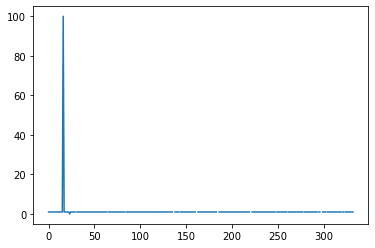

In [11]:
USDT.close.plot()

There are wrong data in USDT close

In [13]:
USDT.close.head(30)

0       1.000800
1       1.000900
2       1.000800
3       1.000800
4       1.000800
5       1.000900
6       1.000900
7       1.000800
8       1.000900
9       1.000900
10      1.000900
11      1.001000
12      1.000900
13      1.001000
14      1.000900
15      1.001000
16    100.100000
17      1.001000
18      1.000900
19      1.000800
20      1.000700
21      1.000500
22      1.000800
23      0.010005
24      1.000500
25      1.000700
26      1.000800
27      1.000800
28      1.001000
29      1.001000
Name: close, dtype: float64

In [14]:
USDT.loc[16,'close']=1.001
USDT.loc[23,'close']=1.0005

<AxesSubplot:>

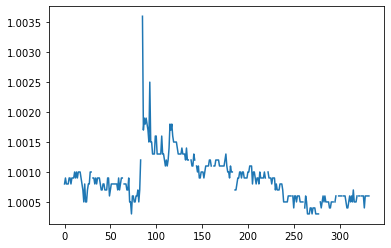

In [15]:
USDT.close.plot()

In [51]:
USDT.close.head(40)

0     1.000800
1     1.000900
2     1.000800
3     1.000800
4     1.000800
5     1.000900
6     1.000900
7     1.000800
8     1.000900
9     1.000900
10    1.000900
11    1.001000
12    1.000900
13    1.001000
14    1.000900
15    1.001000
16    1.001000
17    1.001000
18    1.000900
19    1.000800
20    1.000700
21    1.000500
22    1.000800
23    0.010005
24    1.000500
25    1.000700
26    1.000800
27    1.000800
28    1.001000
29    1.001000
30         NaN
31    1.000900
32    1.000900
33    1.000800
34    1.000900
35    1.000800
36    1.000900
37    1.000900
38    1.000900
39    1.000800
Name: close, dtype: float64

In [52]:
USDT.loc[23,'close']=1.0005

<AxesSubplot:>

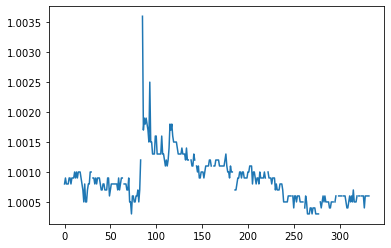

In [53]:
USDT.close.plot()

<AxesSubplot:>

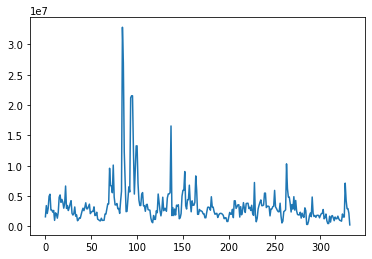

In [41]:
tmp.volume.plot()

In [34]:
data.sort_values(by=['token','ts'])[data.token=='USDT'].ts.head(50)

<ipython-input-34-b62647db7ad4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values(by=['token','ts'])[data.token=='USDT'].ts.head(50)


1382    2021-12-01 00:00:00
1681    2021-12-01 01:00:00
973     2021-12-01 02:00:00
587     2021-12-01 03:00:00
1756    2021-12-01 04:00:00
197     2021-12-01 05:00:00
1724    2021-12-01 06:00:00
906     2021-12-01 07:00:00
2263    2021-12-01 08:00:00
1762    2021-12-01 09:00:00
2308    2021-12-01 10:00:00
1356    2021-12-01 11:00:00
1685    2021-12-01 12:00:00
112     2021-12-01 13:00:00
175     2021-12-01 14:00:00
1543    2021-12-01 15:00:00
1329    2021-12-01 16:00:00
1485    2021-12-01 17:00:00
2456    2021-12-01 18:00:00
104     2021-12-01 19:00:00
262     2021-12-01 20:00:00
1192    2021-12-01 21:00:00
2451    2021-12-01 22:00:00
2401    2021-12-01 23:00:00
2115    2021-12-02 00:00:00
975     2021-12-02 01:00:00
375     2021-12-02 02:00:00
23      2021-12-02 03:00:00
2068    2021-12-02 04:00:00
2135    2021-12-02 05:00:00
1600    2021-12-02 06:00:00
1679    2021-12-02 07:00:00
2385    2021-12-02 08:00:00
782     2021-12-02 09:00:00
1304    2021-12-02 10:00:00
579     2021-12-02 1

In [16]:
USDT['volumeUSD']=USDT['volume']*USDT['close']

<AxesSubplot:>

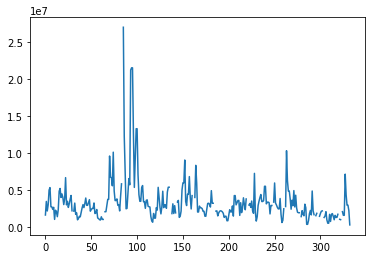

In [17]:
USDT['volumeUSD'].plot()

Also there are reduplicate data in the data, like 1992 and 2128 for USDT

In [25]:
def get_unique(data):
    Times=list(data.ts.unique())
    dicter={}
    for i in Times:
        dicter[i]=data[data.ts==i].iloc[0,:]
    new_data=pd.concat(dicter.values(),axis=1).T
    new_data.index=list(range(len(new_data)))
    return new_data

In [111]:
newUSDT=get_unique(USDT)

In [112]:
newUSDT.volumeUSD.sum()

916167933.7701274

In [ ]:
'UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC'

In [102]:
UNI=data.sort_values(by=['token','ts'])[data.token=='UNI']
UNI.index=list(range(len(UNI)))
CRV=data.sort_values(by=['token','ts'])[data.token=='CRV']
CRV.index=list(range(len(CRV)))
SOL=data.sort_values(by=['token','ts'])[data.token=='SOL']
SOL.index=list(range(len(SOL)))
ETH=data.sort_values(by=['token','ts'])[data.token=='ETH']
ETH.index=list(range(len(ETH)))
AAVE=data.sort_values(by=['token','ts'])[data.token=='AAVE']
AAVE.index=list(range(len(AAVE)))
COMP=data.sort_values(by=['token','ts'])[data.token=='COMP']
COMP.index=list(range(len(COMP)))
BTC=data.sort_values(by=['token','ts'])[data.token=='BTC']
BTC.index=list(range(len(BTC)))

<ipython-input-102-f172c70e0888>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  BTC=data.sort_values(by=['token','ts'])[data.token=='BTC']


<AxesSubplot:>

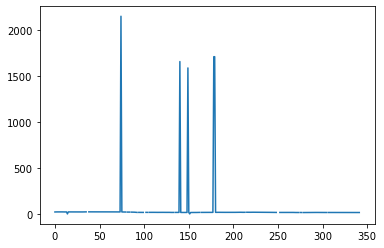

In [30]:
UNI.close.plot()

In [34]:
UNI.loc[70:80,'close']

70      21.8709
71      21.8549
72      21.8305
73      21.7105
74    2145.8800
75      21.2905
76      20.7881
77      20.8179
78      20.8179
79      20.7035
80          NaN
Name: close, dtype: float64

In [35]:
UNI.loc[130:150,'close']

130      16.2022
131      16.2022
132      16.3696
133      16.3696
134          NaN
135      16.4646
136      16.3172
137      16.3020
138      16.3872
139      16.5087
140    1654.0400
141      16.0660
142      16.2051
143      16.2051
144      16.2984
145      16.3616
146      16.2557
147      16.2557
148      16.0411
149    1584.7400
150      15.8718
Name: close, dtype: float64

In [36]:
UNI.loc[175:190,'close']

175      17.1471
176      17.0691
177      16.9817
178    1706.6600
179    1706.6600
180      17.0539
181      17.5764
182      17.5571
183      17.5142
184      17.6010
185      17.2614
186      17.2645
187      17.4657
188      17.5716
189      17.2497
190      17.1985
Name: close, dtype: float64

In [37]:
UNI.loc[74,'close']=21.4588
UNI.loc[140,'close']=16.5404
UNI.loc[149,'close']=15.8474
UNI.loc[178,'close']=17.0666
UNI.loc[179,'close']=17.0666

<AxesSubplot:>

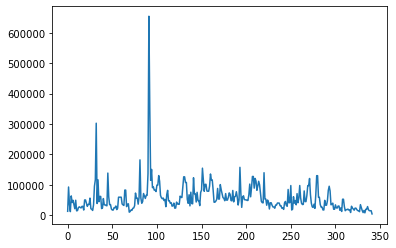

In [31]:
UNI.volume.plot()

In [38]:
UNI['volumeUSD']=UNI['volume']*UNI['close']


In [39]:
def get_unique(data):
    Times=list(data.ts.unique())
    dicter={}
    for i in Times:
        dicter[i]=data[data.ts==i].iloc[0,:]
    new_data=pd.concat(dicter.values(),axis=1).T
    new_data.index=list(range(len(new_data)))
    return new_data
newUNI=get_unique(UNI)
newUNI

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,21.2004,21.3115,21.0337,21.2659,12406.133674,263827.598098,UNI,ETH
1,2021-12-01 01:00:00,21.266,22.1368,21.0305,22.043,92376.543756,2036256.154014,UNI,ETH
2,2021-12-01 02:00:00,22.0408,22.0408,21.7921,21.8667,34805.819485,761088.412933,UNI,ETH
3,2021-12-01 03:00:00,21.8613,22.0187,21.7042,22.0095,11377.553611,250414.266201,UNI,ETH
4,2021-12-01 04:00:00,22.0108,22.2508,21.977,22.2287,63097.410553,1402573.409959,UNI,ETH
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,15.8,15.8,15.43,15.44,27993.397444,432218.056535,UNI,ETH
291,2021-12-13 03:00:00,15.44,15.57,15.37,15.41,17591.589442,271086.393301,UNI,ETH
292,2021-12-13 04:00:00,15.41,NaN,15.37,15.4,14290.828396,220078.757298,UNI,ETH
293,2021-12-13 05:00:00,15.39,15.45,15.34,15.45,14427.253853,222901.072029,UNI,ETH


<AxesSubplot:>

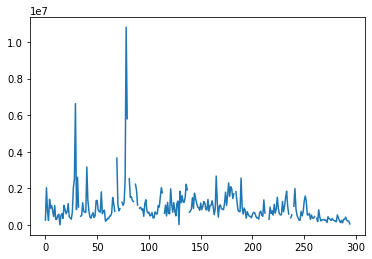

In [40]:
newUNI.volumeUSD.plot()

In [41]:
newUNI.volumeUSD.sum()

272235895.2524253

<AxesSubplot:>

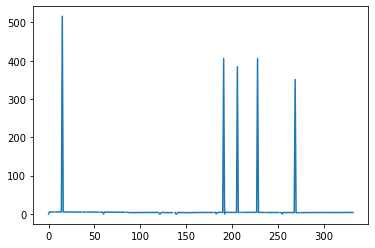

In [42]:
CRV.close.plot()

In [46]:
for i in range(len(CRV)):
    if CRV.loc[i,'close']<0.5:
        CRV.loc[i,'close']=CRV.loc[i,'close']*100
    if CRV.loc[i,'close']>100:
        CRV.loc[i,'close']=CRV.loc[i,'close']/100

<AxesSubplot:>

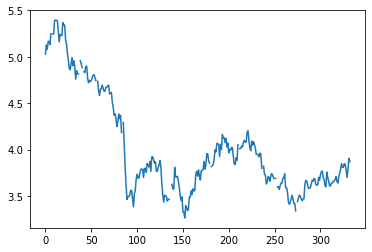

In [47]:
CRV.close.plot()

In [48]:
CRV['volumeUSD']=CRV['volume']*CRV['close']

In [49]:
def get_unique(data):
    Times=list(data.ts.unique())
    dicter={}
    for i in Times:
        dicter[i]=data[data.ts==i].iloc[0,:]
    new_data=pd.concat(dicter.values(),axis=1).T
    new_data.index=list(range(len(new_data)))
    return new_data
newCRV=get_unique(CRV)
newCRV

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,4.883,5.0723,4.8264,5.0295,339580.96,1707922.43832,CRV,ETH
1,2021-12-01 01:00:00,5.0311,5.2,5.0,5.1277,764729.41,3921302.995657,CRV,ETH
2,2021-12-01 02:00:00,5.1245,5.1463,5.0352,5.0824,236376.18,1201358.297232,CRV,ETH
3,2021-12-01 03:00:00,5.083,5.1744,5.0438,5.1669,202554.09,1046576.727621,CRV,ETH
4,2021-12-01 04:00:00,5.1634,5.1754,5.0575,5.1328,192312.1,987099.54688,CRV,ETH
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,3.78,3.79,3.7,3.7,192114.96,710825.352,CRV,ETH
291,2021-12-13 03:00:00,3.69,NaN,3.69,3.78,124283.12,469790.1936,CRV,ETH
292,2021-12-13 04:00:00,3.78,3.908,3.76,3.908,427716.57,1671516.35556,CRV,ETH
293,2021-12-13 05:00:00,3.9,3.91,3.84,3.87,242850.89,939832.9443,CRV,ETH


<AxesSubplot:>

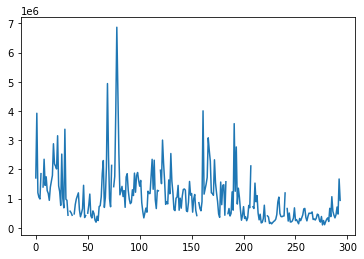

In [50]:
newCRV.volumeUSD.plot()

In [51]:
newCRV.volumeUSD.sum()

297653905.16469914

In [44]:
CRV.loc[:10,'close']

0     0.050295
1     5.127700
2     5.082400
3     5.166900
4     5.166900
5     5.132800
6     5.250000
7          NaN
8     5.245800
9     5.245800
10    5.394800
Name: close, dtype: float64

<AxesSubplot:>

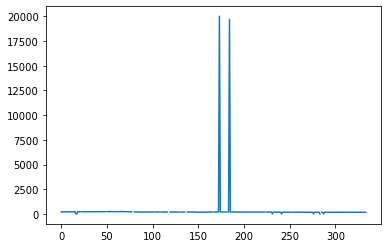

In [57]:
SOL.close.plot()

In [60]:
SOL.loc[170:200,'close']

170      195.658
171      196.503
172      197.218
173    20010.000
174      199.718
175      203.748
176      202.117
177      202.337
178      203.480
179      199.585
180      198.401
181      199.515
182          NaN
183      197.014
184    19698.900
185      195.238
186      194.463
187      192.666
188      191.777
189      189.617
190      190.366
191      192.148
192      191.095
193      191.095
194      188.586
195      186.757
196      188.058
197      187.972
198      189.776
199      189.742
200      189.613
Name: close, dtype: float64

<AxesSubplot:>

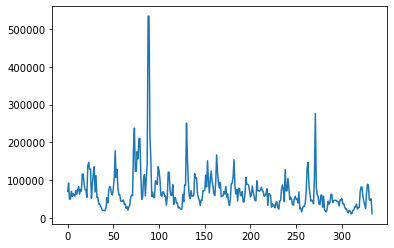

In [53]:
SOL.volume.plot()

In [61]:
for i in range(len(SOL)):
    if SOL.loc[i,'close']<4:
        SOL.loc[i,'close']=SOL.loc[i,'close']*100
    if SOL.loc[i,'close']>2000:
        SOL.loc[i,'close']=SOL.loc[i,'close']/100

<AxesSubplot:>

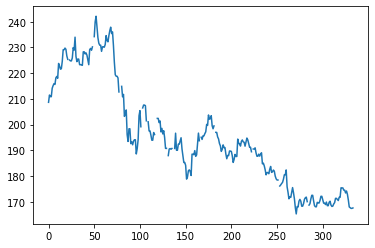

In [62]:
SOL.close.plot()

In [63]:
SOL['volumeUSD']=SOL['volume']*SOL['close']
SOL

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,210.312,NaN,208.432,208.676,70031.618,1.461392e+07,SOL,SOL
1,2021-12-01 01:00:00,208.716,211.773,207.821,211.507,92606.555,1.958693e+07,SOL,SOL
2,2021-12-01 02:00:00,211.506,212.235,210.003,210.868,49728.032,1.048605e+07,SOL,SOL
3,2021-12-01 02:00:00,211.506,212.235,210.003,210.868,49728.032,1.048605e+07,SOL,SOL
4,2021-12-01 03:00:00,210.889,215.063,210.805,214.150,70399.433,1.507604e+07,SOL,SOL
...,...,...,...,...,...,...,...,...,...
329,2021-12-13 02:00:00,170.710,171.090,NaN,168.030,87031.061,1.462383e+07,SOL,SOL
330,2021-12-13 03:00:00,168.060,169.380,167.180,167.770,48298.395,8.103022e+06,SOL,SOL
331,2021-12-13 04:00:00,167.780,168.220,NaN,167.460,46340.920,7.760250e+06,SOL,SOL
332,2021-12-13 05:00:00,167.450,168.090,166.250,167.490,50848.701,8.516649e+06,SOL,SOL


<AxesSubplot:>

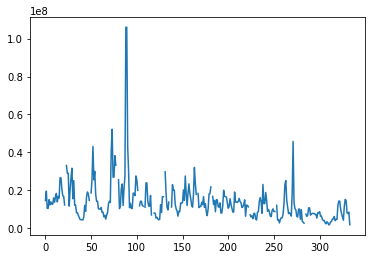

In [64]:

SOL.volumeUSD.plot()

In [66]:
newSOL=get_unique(SOL)
newSOL

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,210.312,NaN,208.432,208.676,70031.618,14613917.917768,SOL,SOL
1,2021-12-01 01:00:00,208.716,211.773,207.821,211.507,92606.555,19586934.628385,SOL,SOL
2,2021-12-01 02:00:00,211.506,212.235,210.003,210.868,49728.032,10486050.651776,SOL,SOL
3,2021-12-01 03:00:00,210.889,215.063,210.805,214.15,70399.433,15076038.57695,SOL,SOL
4,2021-12-01 04:00:00,214.148,215.232,212.707,215.176,57243.379,12317401.319704,SOL,SOL
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,170.71,171.09,NaN,168.03,87031.061,14623829.17983,SOL,SOL
291,2021-12-13 03:00:00,168.06,169.38,167.18,167.77,48298.395,8103021.72915,SOL,SOL
292,2021-12-13 04:00:00,167.78,168.22,NaN,167.46,46340.92,7760250.4632,SOL,SOL
293,2021-12-13 05:00:00,167.45,168.09,166.25,167.49,50848.701,8516648.93049,SOL,SOL


In [67]:
newSOL.volumeUSD.sum()

3836704486.447667

<AxesSubplot:>

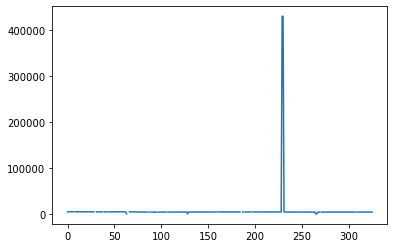

In [68]:
ETH.close.plot()

In [70]:
ETH.loc[220:240,'close']

220      4395.96
221      4376.71
222      4381.38
223      4383.05
224      4346.94
225      4316.99
226      4315.95
227      4315.95
228      4307.61
229    431046.00
230    431046.00
231      4301.82
232      4236.00
233      4204.54
234      4209.49
235      4164.85
236      4164.85
237      4125.39
238      4122.94
239      4125.02
240      4165.72
Name: close, dtype: float64

In [76]:
for i in range(len(ETH)):
    if ETH.loc[i,'close']<100:
        ETH.loc[i,'close']=ETH.loc[i,'close']*100
    if ETH.loc[i,'close']>20000:
        ETH.loc[i,'close']=ETH.loc[i,'close']/100

<AxesSubplot:>

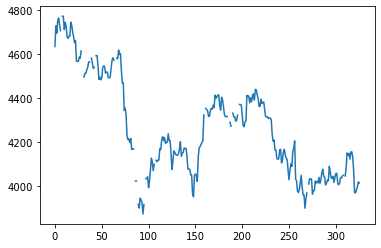

In [77]:
ETH.close.plot()

In [78]:
ETH['volumeUSD']=ETH['volume']*ETH['close']
ETH

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,4656.62,4672.43,4624.16,4634.95,6013.006735,2.786999e+07,ETH,ETH
1,2021-12-01 01:00:00,4636.43,4736.90,4605.49,4729.10,13819.061610,6.535172e+07,ETH,ETH
2,2021-12-01 02:00:00,4729.10,4729.10,4684.49,4695.78,7491.465440,3.517827e+07,ETH,ETH
3,2021-12-01 03:00:00,4695.78,NaN,4672.30,4754.09,10530.834423,5.006453e+07,ETH,ETH
4,2021-12-01 04:00:00,4754.09,4774.74,4722.02,4764.59,12471.624735,5.942218e+07,ETH,ETH
...,...,...,...,...,...,...,...,...,...
321,2021-12-13 02:00:00,4070.58,4070.58,3961.85,3970.92,18723.615566,7.434998e+07,ETH,ETH
322,2021-12-13 03:00:00,3970.92,3999.90,3954.27,3984.29,8106.286351,3.229780e+07,ETH,ETH
323,2021-12-13 04:00:00,3984.29,4012.00,NaN,3998.87,4939.751497,1.975342e+07,ETH,ETH
324,2021-12-13 05:00:00,3999.08,4023.92,3991.22,4020.10,3765.285201,1.513682e+07,ETH,ETH


In [79]:
newETH=get_unique(ETH)
newETH

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,4656.62,4672.43,4624.16,4634.95,6013.006735,27869985.565322,ETH,ETH
1,2021-12-01 01:00:00,4636.43,4736.9,4605.49,4729.1,13819.06161,65351724.258054,ETH,ETH
2,2021-12-01 02:00:00,4729.1,4729.1,4684.49,4695.78,7491.46544,35178273.583843,ETH,ETH
3,2021-12-01 03:00:00,4695.78,NaN,4672.3,4754.09,10530.834423,50064534.621755,ETH,ETH
4,2021-12-01 04:00:00,4754.09,4774.74,4722.02,4764.59,12471.624735,59422178.496562,ETH,ETH
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,4070.58,4070.58,3961.85,3970.92,18723.615566,74349979.525167,ETH,ETH
291,2021-12-13 03:00:00,3970.92,3999.9,3954.27,3984.29,8106.286351,32297795.646701,ETH,ETH
292,2021-12-13 04:00:00,3984.29,4012.0,NaN,3998.87,4939.751497,19753424.067649,ETH,ETH
293,2021-12-13 05:00:00,3999.08,4023.92,3991.22,4020.1,3765.285201,15136823.03461,ETH,ETH


In [80]:
newETH.volumeUSD.sum()

11942929866.11639

<AxesSubplot:>

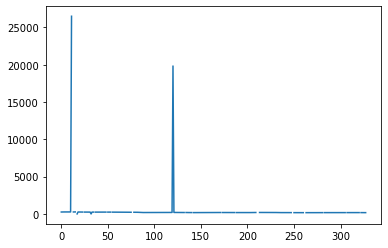

In [81]:
AAVE.close.plot()

In [82]:
AAVE.loc[:30,'close']

0       257.0780
1       264.8160
2       263.1250
3       266.2570
4       265.5020
5       265.0730
6       262.6210
7       265.4980
8       267.0700
9       264.4090
10      267.3440
11    26501.5000
12           NaN
13      263.5590
14      265.8830
15      268.7670
16           NaN
17        2.6323
18      260.0660
19      257.9050
20      258.2870
21      252.1900
22      251.6560
23      251.1450
24           NaN
25      249.0560
26      249.5580
27      247.8110
28      244.5490
29      245.7720
30      246.8600
Name: close, dtype: float64

In [85]:
for i in range(len(AAVE)):
    if AAVE.loc[i,'close']<100:
        AAVE.loc[i,'close']=AAVE.loc[i,'close']*100
    if AAVE.loc[i,'close']>2000:
        AAVE.loc[i,'close']=AAVE.loc[i,'close']/100

<AxesSubplot:>

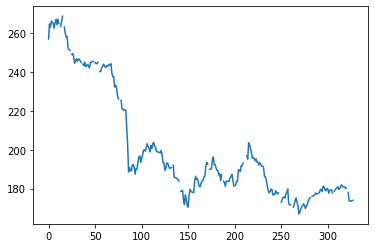

In [86]:
AAVE.close.plot()

In [87]:
AAVE['volumeUSD']=AAVE['volume']*AAVE['close']
AAVE

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,257.102,260.775,255.345,257.078,2730.299,7.018998e+05,AAVE,ETH
1,2021-12-01 01:00:00,257.149,266.249,255.270,264.816,5752.541,1.523365e+06,AAVE,ETH
2,2021-12-01 02:00:00,264.755,266.187,262.597,263.125,1559.330,4.102987e+05,AAVE,ETH
3,2021-12-01 03:00:00,263.184,NaN,NaN,266.257,1647.398,4.386312e+05,AAVE,ETH
4,2021-12-01 04:00:00,266.384,267.024,264.284,265.502,829.993,2.203648e+05,AAVE,ETH
...,...,...,...,...,...,...,...,...,...
323,2021-12-13 02:00:00,178.000,178.000,173.640,173.640,3987.529,6.923945e+05,AAVE,ETH
324,2021-12-13 03:00:00,173.700,NaN,173.510,173.720,713.174,1.238926e+05,AAVE,ETH
325,2021-12-13 04:00:00,173.630,174.150,173.260,173.490,599.995,1.040931e+05,AAVE,ETH
326,2021-12-13 05:00:00,173.490,174.190,173.240,173.810,604.478,1.050643e+05,AAVE,ETH


In [88]:
newAAVE=get_unique(AAVE)
newAAVE

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,257.102,260.775,255.345,257.078,2730.299,701899.806322,AAVE,ETH
1,2021-12-01 01:00:00,257.149,266.249,255.27,264.816,5752.541,1523364.897456,AAVE,ETH
2,2021-12-01 02:00:00,264.755,266.187,262.597,263.125,1559.33,410298.70625,AAVE,ETH
3,2021-12-01 03:00:00,263.184,NaN,NaN,266.257,1647.398,438631.249286,AAVE,ETH
4,2021-12-01 04:00:00,266.384,267.024,264.284,265.502,829.993,220364.801486,AAVE,ETH
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,178.0,178.0,173.64,173.64,3987.529,692394.53556,AAVE,ETH
291,2021-12-13 03:00:00,173.7,NaN,173.51,173.72,713.174,123892.58728,AAVE,ETH
292,2021-12-13 04:00:00,173.63,174.15,173.26,173.49,599.995,104093.13255,AAVE,ETH
293,2021-12-13 05:00:00,173.49,174.19,173.24,173.81,604.478,105064.32118,AAVE,ETH


In [89]:
newAAVE.volumeUSD.sum()

134916806.25805405

<AxesSubplot:>

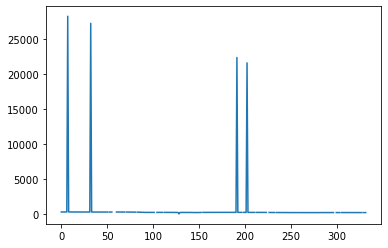

In [90]:
COMP.close.plot()

In [91]:
for i in range(len(COMP)):
    if COMP.loc[i,'close']<100:
        COMP.loc[i,'close']=COMP.loc[i,'close']*100
    if COMP.loc[i,'close']>2000:
        COMP.loc[i,'close']=COMP.loc[i,'close']/100

<AxesSubplot:>

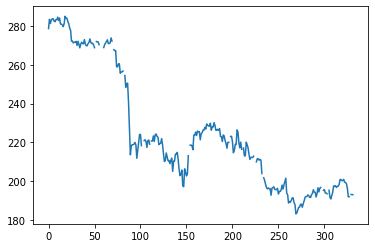

In [92]:
COMP.close.plot()

In [93]:
COMP['volumeUSD']=COMP['volume']*COMP['close']
COMP

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,280.59,281.40,278.30,278.70,207.849,57927.51630,COMP,ETH
1,2021-12-01 01:00:00,278.65,283.80,276.36,283.44,817.668,231759.81792,COMP,ETH
2,2021-12-01 02:00:00,283.20,NaN,280.61,281.29,254.330,71540.48570,COMP,ETH
3,2021-12-01 03:00:00,281.25,283.22,279.90,283.09,393.771,111472.63239,COMP,ETH
4,2021-12-01 04:00:00,283.10,284.16,282.60,283.73,489.120,138778.01760,COMP,ETH
...,...,...,...,...,...,...,...,...,...
327,2021-12-13 03:00:00,191.69,193.47,190.95,191.96,530.342,101804.45032,COMP,ETH
328,2021-12-13 04:00:00,191.85,192.87,191.19,NaN,1046.025,NaN,COMP,ETH
329,2021-12-13 05:00:00,191.95,193.58,191.35,193.11,659.082,127275.32502,COMP,ETH
330,2021-12-13 06:00:00,193.11,193.23,192.53,193.01,99.653,19234.02553,COMP,ETH


<AxesSubplot:>

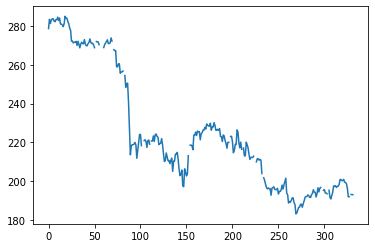

In [94]:
COMP.close.plot()

<AxesSubplot:>

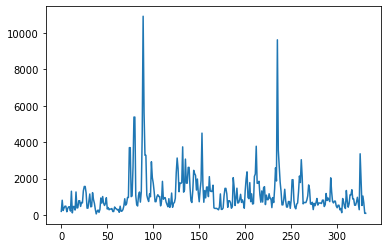

In [95]:
COMP.volume.plot()

In [96]:
newCOMP=get_unique(COMP)
newCOMP

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,280.59,281.4,278.3,278.7,207.849,57927.5163,COMP,ETH
1,2021-12-01 01:00:00,278.65,283.8,276.36,283.44,817.668,231759.81792,COMP,ETH
2,2021-12-01 02:00:00,283.2,NaN,280.61,281.29,254.33,71540.4857,COMP,ETH
3,2021-12-01 03:00:00,281.25,283.22,279.9,283.09,393.771,111472.63239,COMP,ETH
4,2021-12-01 04:00:00,283.1,284.16,282.6,283.73,489.12,138778.0176,COMP,ETH
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,196.31,196.32,191.8,191.86,1901.019,364729.50534,COMP,ETH
291,2021-12-13 03:00:00,191.69,193.47,190.95,191.96,530.342,101804.45032,COMP,ETH
292,2021-12-13 04:00:00,191.85,192.87,191.19,NaN,1046.025,NaN,COMP,ETH
293,2021-12-13 05:00:00,191.95,193.58,191.35,193.11,659.082,127275.32502,COMP,ETH


In [97]:
newCOMP.volumeUSD.sum()

69114097.13505

<AxesSubplot:>

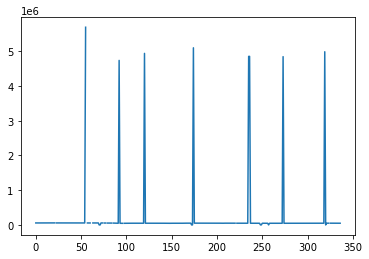

In [103]:
BTC.close.plot()

In [104]:
BTC.loc[50:60,'close']

50      56755.00
51      56637.87
52      56637.87
53      57075.10
54      56905.81
55    5688883.00
56           NaN
57      56569.29
58      56545.98
59      56545.98
60      56301.44
Name: close, dtype: float64

In [105]:
for i in range(len(BTC)):
    if BTC.loc[i,'close']<7000:
         BTC.loc[i,'close']=BTC.loc[i,'close']*100
    if BTC.loc[i,'close']>100000:
        BTC.loc[i,'close']=BTC.loc[i,'close']/100

<AxesSubplot:>

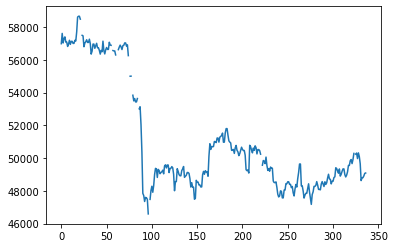

In [106]:
BTC.close.plot()

In [107]:
BTC['volumeUSD']=BTC['volume']*BTC['close']
BTC

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,57321.41,57451.05,56814.34,56987.97,388.482022,2.213880e+07,BTC,BTC
1,2021-12-01 01:00:00,56998.35,57726.45,56705.06,57616.41,599.791578,3.455784e+07,BTC,BTC
2,2021-12-01 02:00:00,57618.55,57620.00,56972.97,57030.83,591.687200,3.374441e+07,BTC,BTC
3,2021-12-01 03:00:00,57029.79,57396.87,NaN,57307.59,702.560364,4.026204e+07,BTC,BTC
4,2021-12-01 04:00:00,57306.55,57456.82,57026.11,57404.01,859.591535,4.934400e+07,BTC,BTC
...,...,...,...,...,...,...,...,...,...
332,2021-12-13 03:00:00,48625.72,48912.18,48464.66,48803.24,525.377710,2.564013e+07,BTC,BTC
333,2021-12-13 03:00:00,48625.72,48912.18,48464.66,48803.24,525.377710,2.564013e+07,BTC,BTC
334,2021-12-13 04:00:00,48803.24,49114.07,48725.23,48909.61,304.717117,1.490360e+07,BTC,BTC
335,2021-12-13 05:00:00,48909.61,NaN,48791.14,49065.42,279.469275,1.371228e+07,BTC,BTC


<AxesSubplot:>

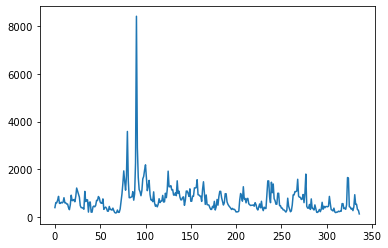

In [108]:
BTC.volume.plot()

In [109]:
newBTC=get_unique(BTC)
newBTC

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-01 00:00:00,57321.41,57451.05,56814.34,56987.97,388.482022,22138801.815845,BTC,BTC
1,2021-12-01 01:00:00,56998.35,57726.45,56705.06,57616.41,599.791578,34557837.447244,BTC,BTC
2,2021-12-01 02:00:00,57618.55,57620.0,56972.97,57030.83,591.6872,33744412.114095,BTC,BTC
3,2021-12-01 03:00:00,57029.79,57396.87,NaN,57307.59,702.560364,40262041.317297,BTC,BTC
4,2021-12-01 04:00:00,57306.55,57456.82,57026.11,57404.01,859.591535,49344001.064741,BTC,BTC
...,...,...,...,...,...,...,...,...,...
290,2021-12-13 02:00:00,49663.75,49664.16,48595.01,48624.41,929.600989,45201299.614358,BTC,BTC
291,2021-12-13 03:00:00,48625.72,48912.18,48464.66,48803.24,525.37771,25640134.453723,BTC,BTC
292,2021-12-13 04:00:00,48803.24,49114.07,48725.23,48909.61,304.717117,14903595.365022,BTC,BTC
293,2021-12-13 05:00:00,48909.61,NaN,48791.14,49065.42,279.469275,13712277.342704,BTC,BTC


In [110]:
newBTC.volumeUSD.sum()

10510350308.387794

In [113]:
lister=[newUNI, newCRV, newSOL, newETH, newAAVE, newUSDT, newCOMP, newBTC,newUSDT]
count=0
for i in lister:
    count+=i.volumeUSD.sum()
count

28896241232.302338